# House Price Prediction System

The House Price Prediction System is a data science project aimed at predicting the prices of houses based on various features. This project leverages historical housing data to build a predictive model that can estimate the value of a house given specific characteristics. The goal is to assist potential buyers, real estate agents, and developers in making informed decisions by providing accurate price predictions.



<img src="https://agoldbergphoto.com/wp-content/uploads/residential/Residential-13-2000x1333.jpg" 
alt="house" width="1000" height="700">)

## About the Dataset

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is predicmtion target                                                                                 |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


## Importing Libraries

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
from scipy import stats
import requests
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

### Load Dataset

You can download this dataset from Kaggle. Here is the link:  'https://www.kaggle.com/datasets/harlfoxem/housesalesprediction/data?select=kc_house_data.csv'

In [12]:
#load data 
df=pd.read_csv('housesalesprediction/kc_house_data.csv')

## Data Wrangling

In [14]:
df.shape

(21613, 21)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [16]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [17]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [18]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## Data Cleaning


In [20]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [21]:
df.duplicated().sum()

0

In [22]:
df['date']=pd.to_datetime(df['date']) # Convert the column to datetime format

In [23]:
df['bathrooms']=df['bathrooms'].astype(int) # Convert the column to integer type

In [24]:
df['floors']=df['floors'].astype(int) # Convert the column to integer type

In [25]:
df['price']=df['price'].astype(int) # Convert the column to integer type

In [26]:
df.nunique() #count of unique values for each column

id               21436
date               372
price             4028
bedrooms            13
bathrooms            9
sqft_living       1038
sqft_lot          9782
floors               3
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [27]:
df.zipcode.unique() #unique values of zipcode column.

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)

In [28]:
# Create a new 'renovated' column where 1 indicates renovation and 0 indicates no renovation
df['renovated'] = np.where(df['yr_renovated'] == 0, 0, 1) 

In [29]:
# Extract the year from the 'date' column and create a new 'year' column
df['year'] = df['date'].apply(lambda date: date.year)
# Calculate the age of the house 
df['house_age'] = df['year'] - df['yr_built']

In [30]:
df.drop(columns=["yr_renovated","yr_built","id","date"], axis=1, inplace=True)

In [31]:
df.shape

(21613, 20)

In [394]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,year,house_age
0,221900,3,1,1180,5650,1,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,0,2014,59
1,538000,3,2,2570,7242,2,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,1,2014,63
2,180000,2,1,770,10000,1,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,0,2015,82
3,604000,4,3,1960,5000,1,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,0,2014,49
4,510000,3,2,1680,8080,1,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,0,2015,28


## Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Correlation Heatmap')

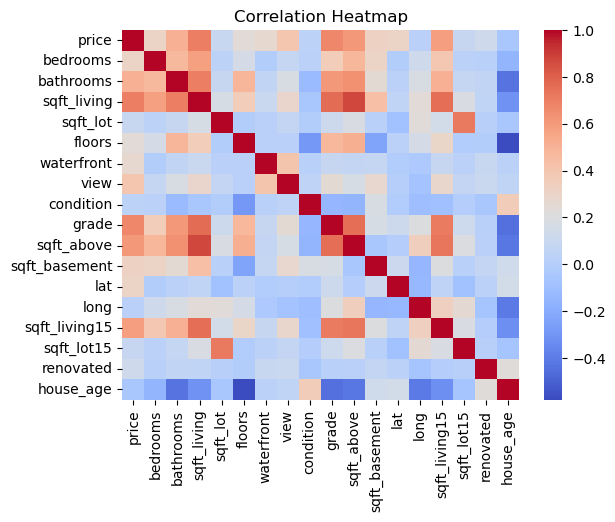

In [34]:
#creates a heatmap to visualize the correlation matrix of the DataFrame, while excluding the year and zipcode columns.
sns.heatmap(df.drop(['year', 'zipcode'], axis=1).corr(), cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

sqft_living, sqft_above, bathrooms, grade, sqft_living15 have a strong positive linear correlation to price.

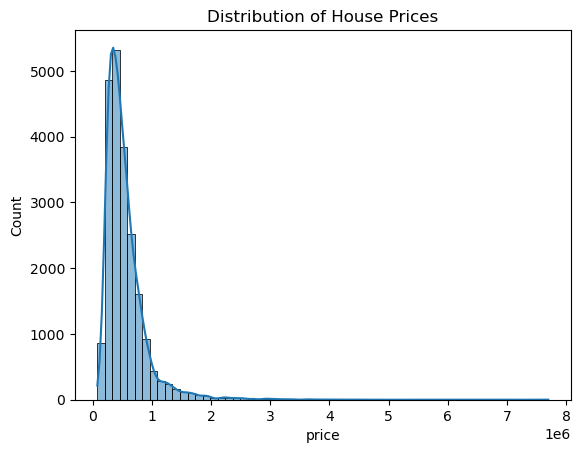

In [36]:
# Plot a histogram of house prices to show the distribution of prices
sns.histplot(data=df,x='price',bins=60,kde=True)
plt.title('Distribution of House Prices')
plt.show()

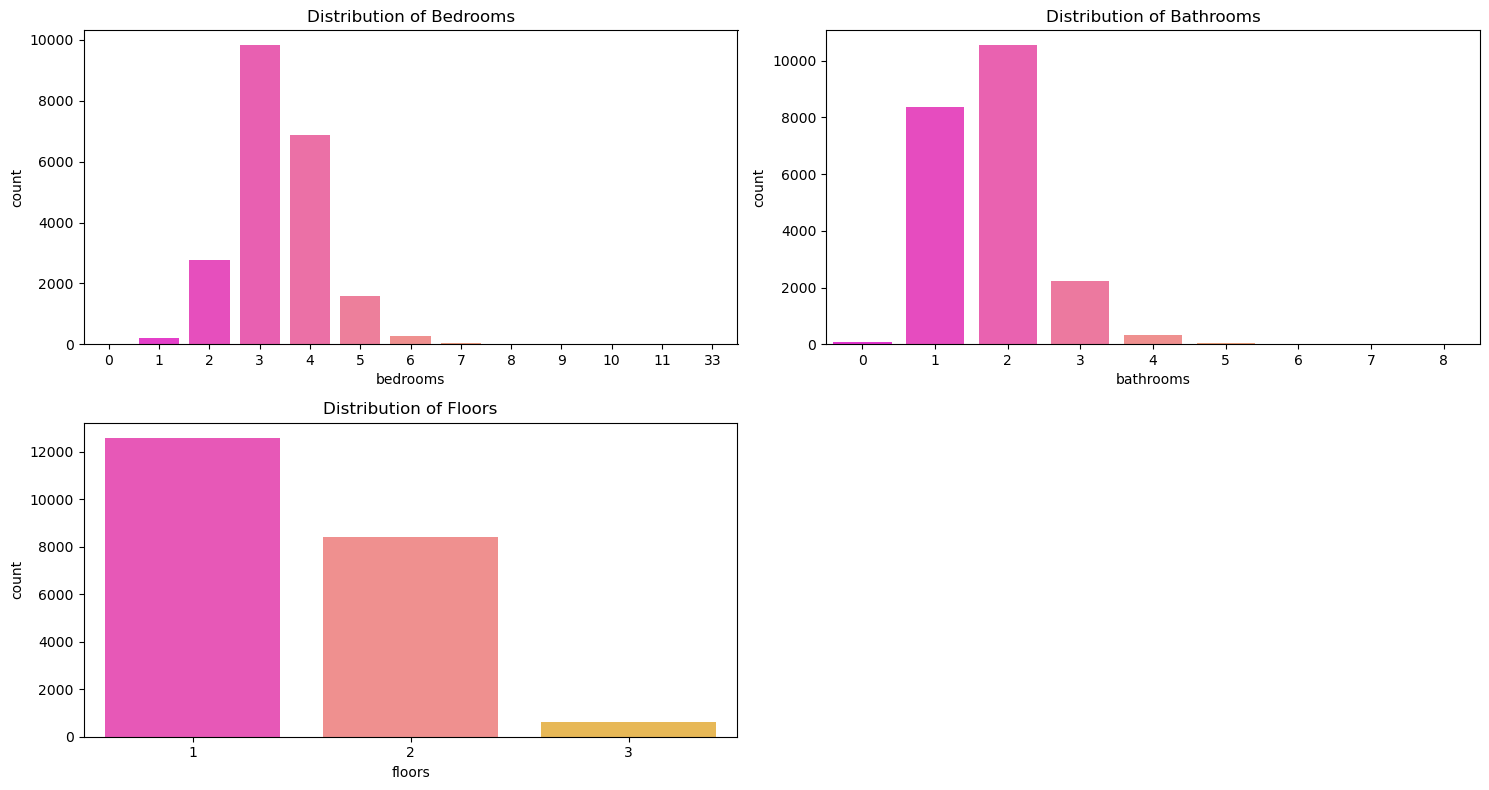

In [37]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.countplot(data=df, x='bedrooms', palette='spring') 
plt.title('Distribution of Bedrooms')
plt.subplot(2,2,2)
sns.countplot(data=df, x='bathrooms', palette='spring')
plt.title('Distribution of Bathrooms')
plt.subplot(2,2,3)
sns.countplot(data=df, x='floors', palette='spring')
plt.title('Distribution of Floors')
plt.tight_layout()  
plt.show()

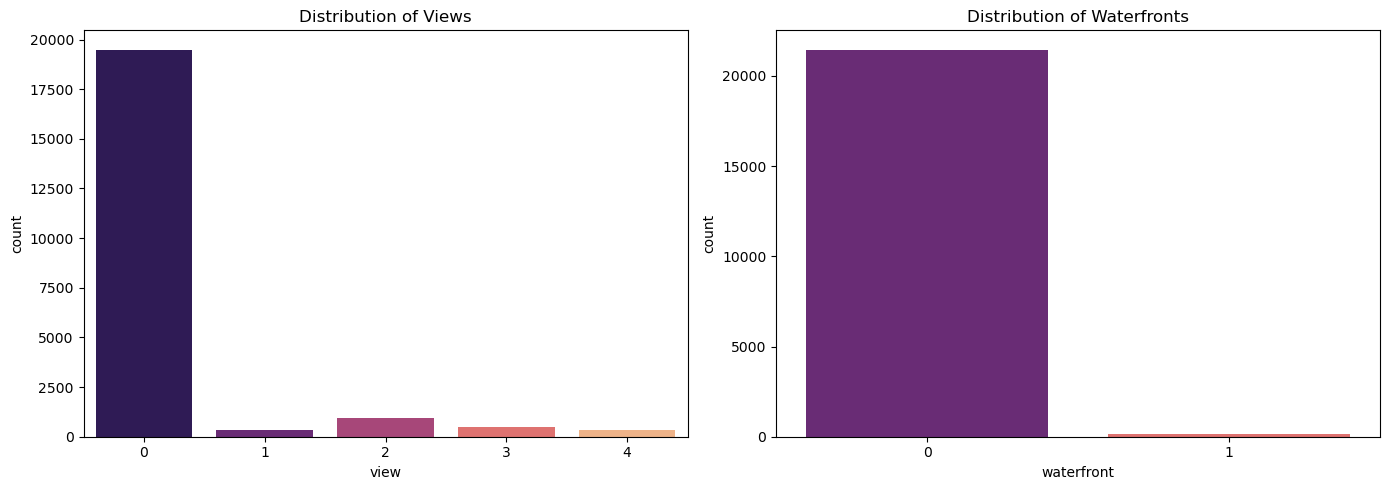

In [38]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.countplot(data=df, x='view', palette='magma')
plt.title('Distribution of Views')
plt.subplot(1,2,2)
sns.countplot(data=df, x='waterfront', palette='magma')
plt.title('Distribution of Waterfronts')
plt.tight_layout() 
plt.show()

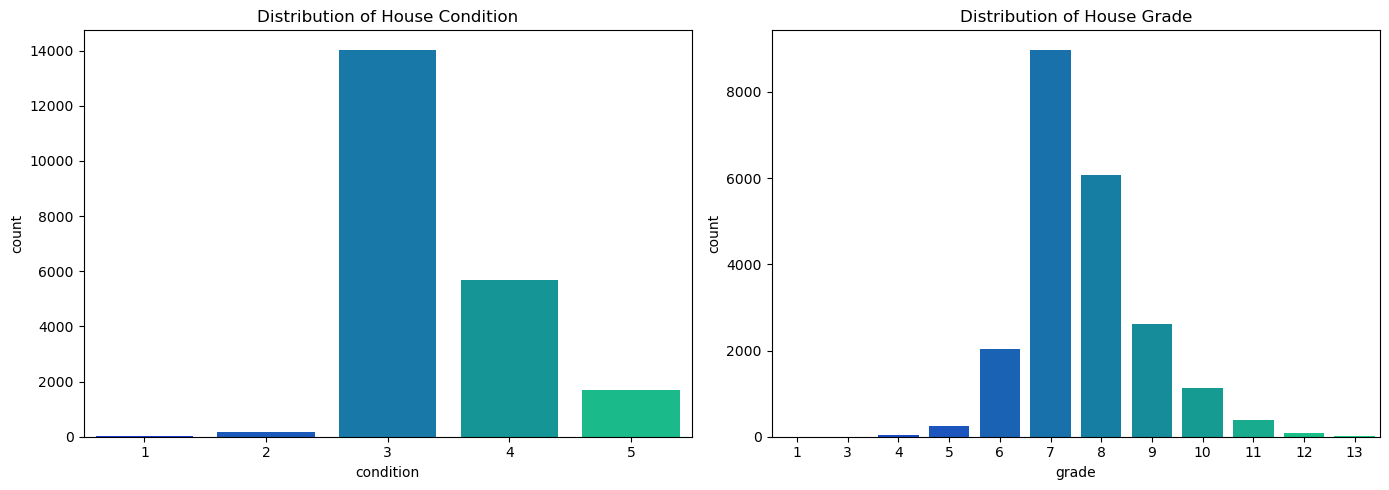

In [39]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.countplot(data=df, x='condition', palette='winter')
plt.title('Distribution of House Condition')
plt.subplot(1,2,2)
sns.countplot(data=df, x='grade', palette='winter')
plt.title('Distribution of House Grade')
plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

Text(0.5, 1.0, 'Distribution of Renovated vs. Non-Renovated House')

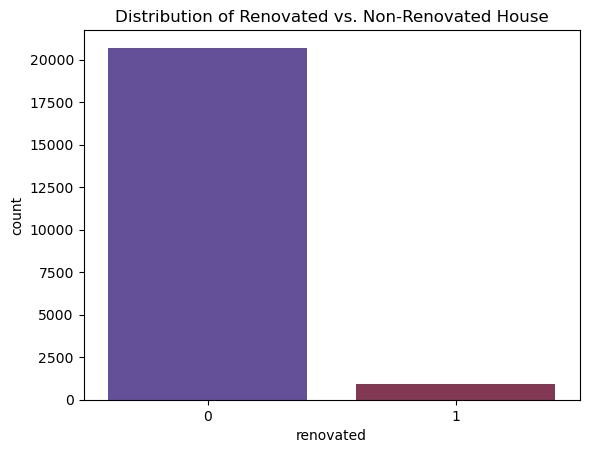

In [40]:
sns.countplot(data=df, x='renovated', palette='twilight')
plt.title('Distribution of Renovated vs. Non-Renovated House')

Text(0.5, 1.0, 'Distribution of Lot Area (sqft)')

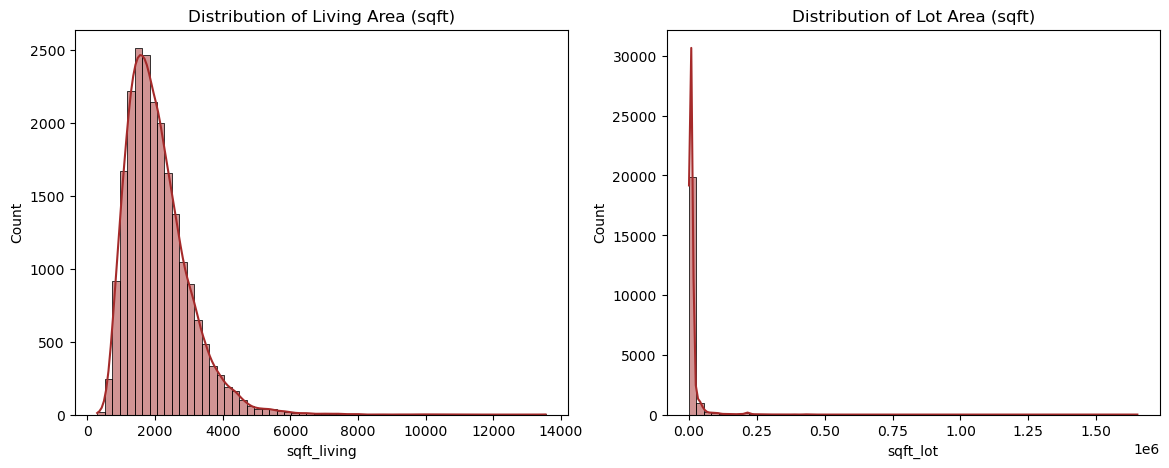

In [41]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.histplot(data=df,x='sqft_living',bins=60,kde=True,color='brown')
plt.title('Distribution of Living Area (sqft)')
plt.subplot(1,2,2)
sns.histplot(data=df,x='sqft_lot',bins=60,kde=True,color='brown')
plt.title('Distribution of Lot Area (sqft)')

Text(0.5, 1.0, 'Distribution of Basement Sqft')

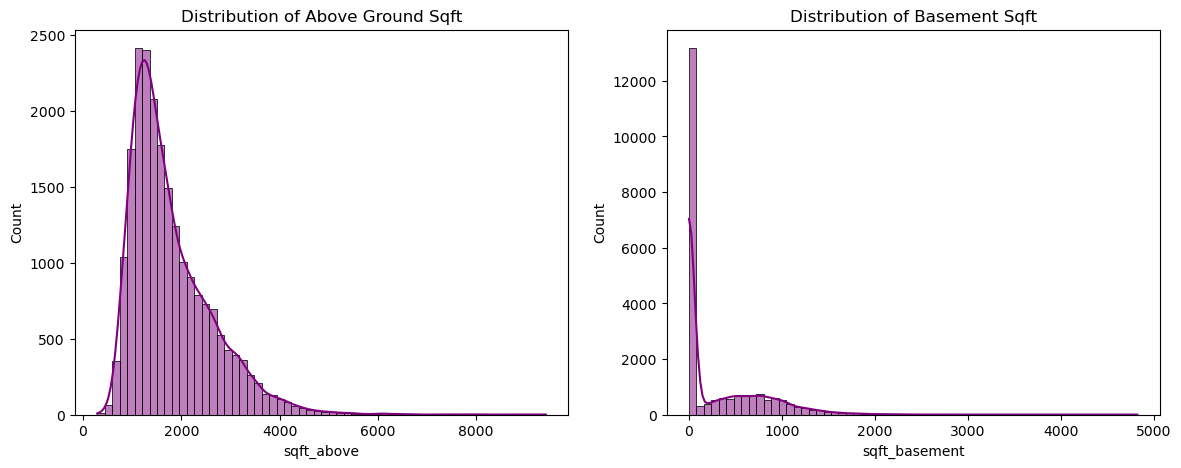

In [42]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.histplot(data=df,x='sqft_above',bins=60,kde=True,color='purple')
plt.title('Distribution of Above Ground Sqft')
plt.subplot(1,2,2)
sns.histplot(data=df,x='sqft_basement',bins=60,kde=True,color='purple')
plt.title('Distribution of Basement Sqft')

Text(0.5, 1.0, 'Distribution of Lot Area (15-Year Median)')

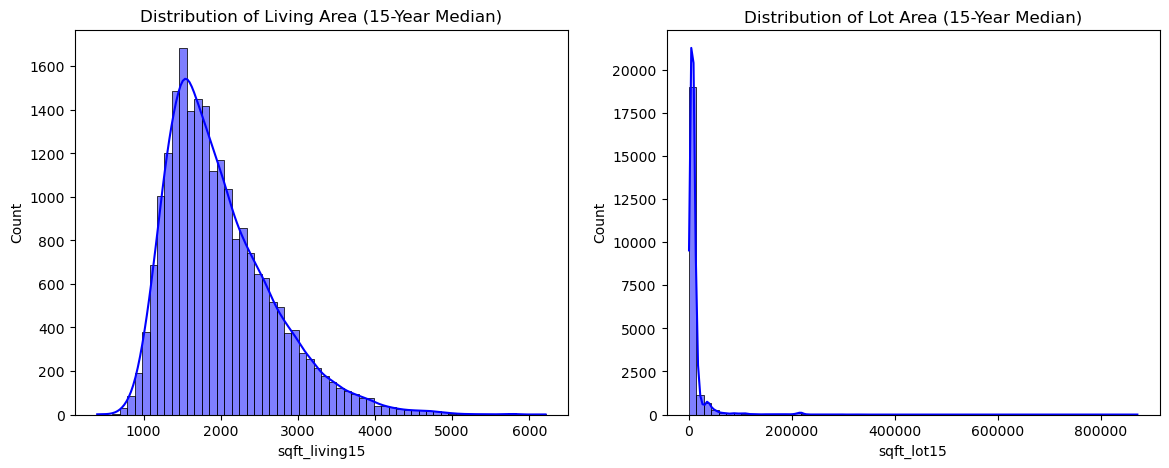

In [43]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.histplot(data=df,x='sqft_living15',bins=60,kde=True,color='b')
plt.title('Distribution of Living Area (15-Year Median)')
plt.subplot(1,2,2)
sns.histplot(data=df,x='sqft_lot15',bins=60,kde=True,color='b')
plt.title('Distribution of Lot Area (15-Year Median)')

**Regression Analysis of sqft_living vs price**

,sqft_living,price
sqft_living,1.000000,0.702035
price,0.702035,1.000000


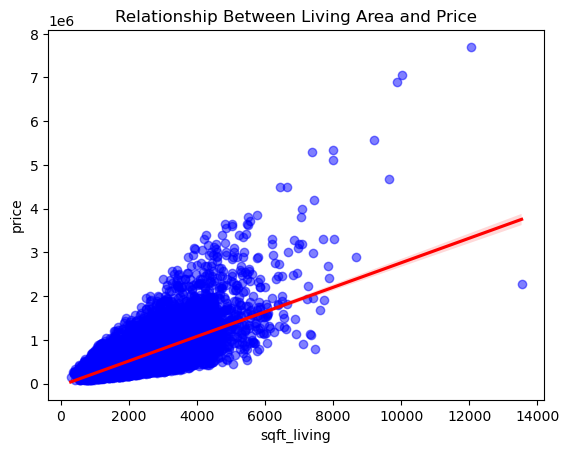

In [45]:
#Create a scatter plot with a regression line
sns.regplot(x="sqft_living", y="price", data=df,
            scatter_kws={"color": "b", "alpha": 0.5}, line_kws={"color": "red"})
plt.title('Relationship Between Living Area and Price')
df[["sqft_living", "price"]].corr() #correlation between 'sqft_living' and 'price'

**Regression Analysis of sqft_lot vs price**

,sqft_lot,price
sqft_lot,1.000000,0.089661
price,0.089661,1.000000


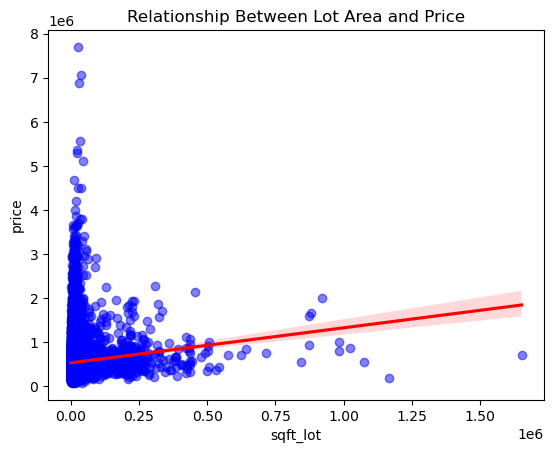

In [47]:
#Create a scatter plot with a regression line
sns.regplot(x="sqft_lot", y="price", data=df,
            scatter_kws={"color": "b", "alpha": 0.5}, line_kws={"color": "red"})
plt.title('Relationship Between Lot Area and Price')
df[["sqft_lot", "price"]].corr() #correlation between 'sqft_lot' and 'price'

**Regression Analysis of sqft_above vs price**

,sqft_above,price
sqft_above,1.000000,0.605567
price,0.605567,1.000000


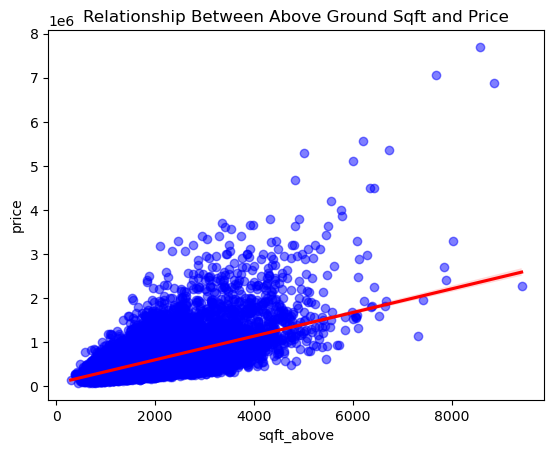

In [49]:
# Create a scatter plot with a regression line
sns.regplot(x="sqft_above", y="price", data=df,
            scatter_kws={"color": "b", "alpha": 0.5}, line_kws={"color": "red"})
plt.title('Relationship Between Above Ground Sqft and Price')
df[["sqft_above", "price"]].corr() #correlation between 'sqft_above' and 'price'

**Regression Analysis of sqft_basement vs price**

,sqft_basement,price
sqft_basement,1.000000,0.323816
price,0.323816,1.000000


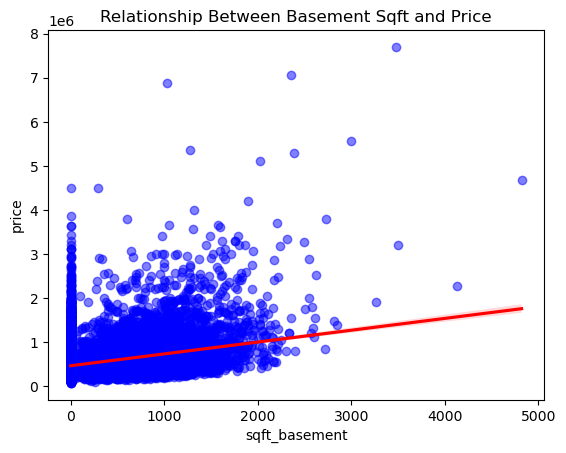

In [51]:
# Create a scatter plot with a regression line
sns.regplot(x="sqft_basement", y="price", data=df,
            scatter_kws={"color": "b", "alpha": 0.5}, line_kws={"color": "red"})
plt.title('Relationship Between Basement Sqft and Price')
df[["sqft_basement", "price"]].corr() #correlation between 'sqft_basement' and 'price'

**Regression Analysis of sqft_living15 vs price**

,sqft_living15,price
sqft_living15,1.000000,0.585379
price,0.585379,1.000000


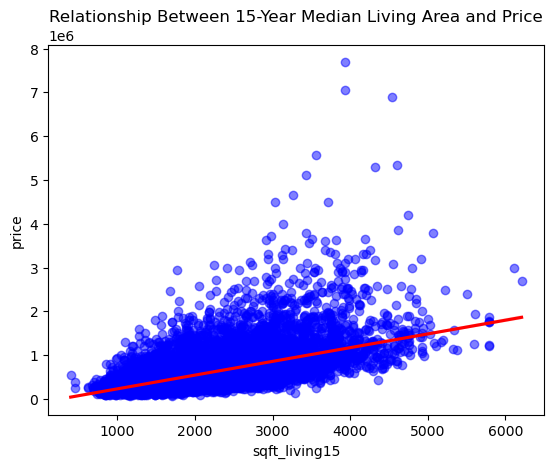

In [53]:
# Create a scatter plot with a regression line
sns.regplot(x="sqft_living15", y="price", data=df,
            scatter_kws={"color": "b", "alpha": 0.5}, line_kws={"color": "red"})
plt.title('Relationship Between 15-Year Median Living Area and Price')
df[["sqft_living15", "price"]].corr() #correlation between 'sqft_living15' and 'price'

**Regression Analysis of sqft_lot15 vs price**

,sqft_lot15,price
sqft_lot15,1.000000,0.082447
price,0.082447,1.000000


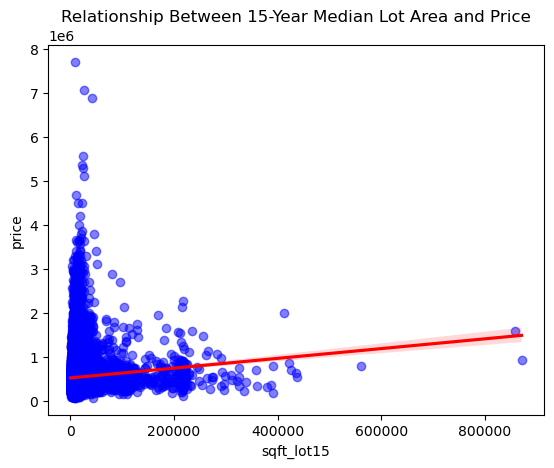

In [55]:
# Create a scatter plot with a regression line
sns.regplot(x="sqft_lot15", y="price", data=df,
            scatter_kws={"color": "b", "alpha": 0.5}, line_kws={"color": "red"})
plt.title('Relationship Between 15-Year Median Lot Area and Price')
df[["sqft_lot15", "price"]].corr() #correlation between 'sqft_lot15' and 'price'

**Regression Analysis of zipcode vs price**

,zipcode,price
zipcode,1.000000,-0.053203
price,-0.053203,1.000000


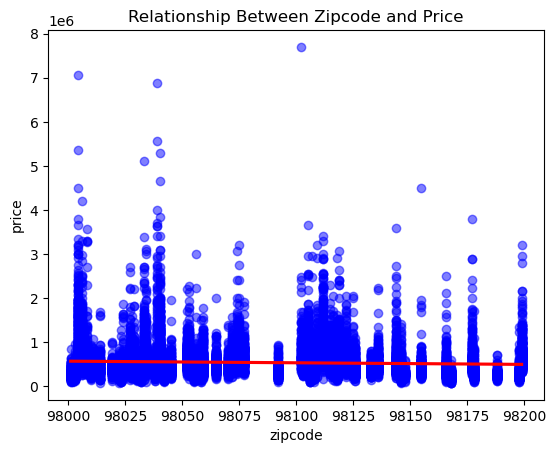

In [57]:
# Create a scatter plot with a regression line
sns.regplot(x="zipcode", y="price", data=df,
            scatter_kws={"color": "b", "alpha": 0.5}, line_kws={"color": "red"})
plt.title('Relationship Between Zipcode and Price')
df[["zipcode", "price"]].corr() #correlation between 'zipcode' and 'price'

**Regression Analysis of long vs price**

,long,price
long,1.000000,0.021626
price,0.021626,1.000000


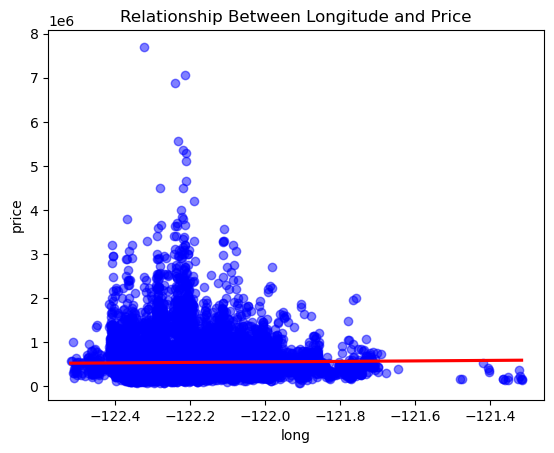

In [59]:
# Create a scatter plot with a regression line
sns.regplot(x="long", y="price", data=df,
            scatter_kws={"color": "b", "alpha": 0.5}, line_kws={"color": "red"})
plt.title('Relationship Between Longitude and Price')
df[["long", "price"]].corr() #correlation between 'long' and 'price'

**Regression Analysis of lat vs price**

,lat,price
lat,1.000000,0.307003
price,0.307003,1.000000


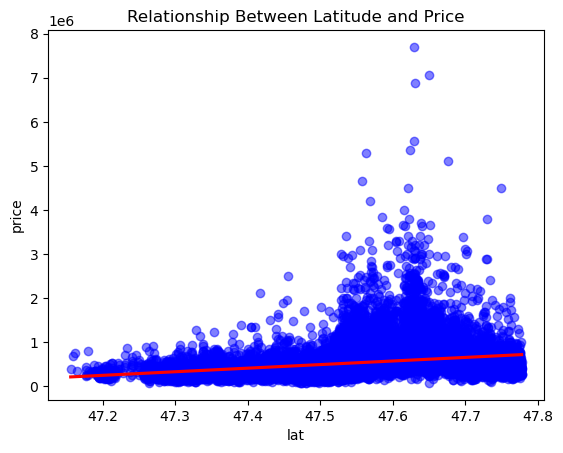

In [61]:
# Create a scatter plot with a regression line
sns.regplot(x="lat", y="price", data=df,
            scatter_kws={"color": "b", "alpha": 0.5}, line_kws={"color": "red"})
plt.title('Relationship Between Latitude and Price')
df[["lat", "price"]].corr() #correlation between 'lat' and 'price'

**Regression Analysis of house_age vs price**

,house_age,price
house_age,1.000000,-0.053951
price,-0.053951,1.000000


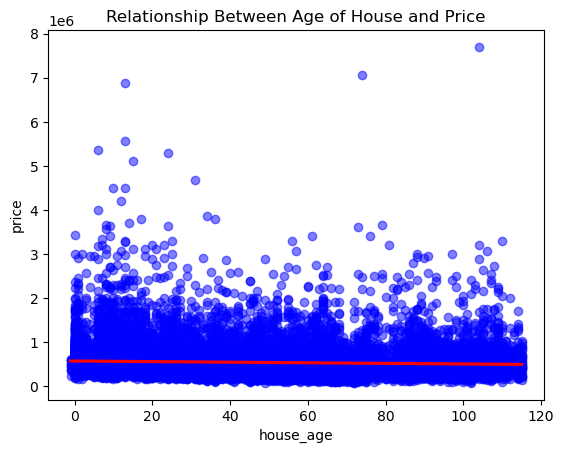

In [63]:
# Create a scatter plot with a regression line
sns.regplot(x="house_age", y="price", data=df,
            scatter_kws={"color": "b", "alpha": 0.5}, line_kws={"color": "red"})
plt.title('Relationship Between Age of House and Price')
df[["house_age", "price"]].corr() #correlation between 'house_age' and 'price'

,bedrooms,price
bedrooms,1.00000,0.30835
price,0.30835,1.00000


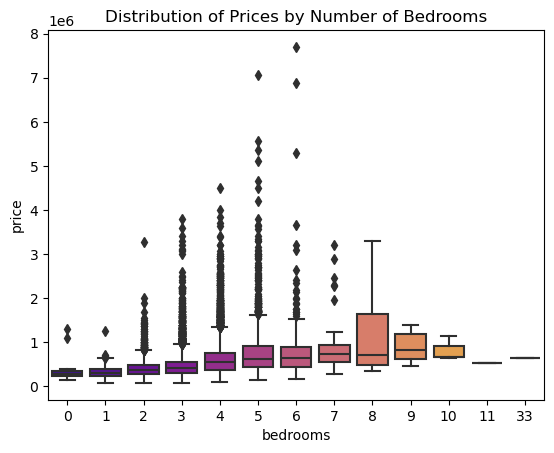

In [64]:
#Create a box plot
sns.boxplot(x="bedrooms", y="price", data=df, palette='plasma')
plt.title('Distribution of Prices by Number of Bedrooms')
df[["bedrooms", "price"]].corr() #correlation between 'bedrooms' and 'price'

,bathrooms,price
bathrooms,1.000000,0.510072
price,0.510072,1.000000


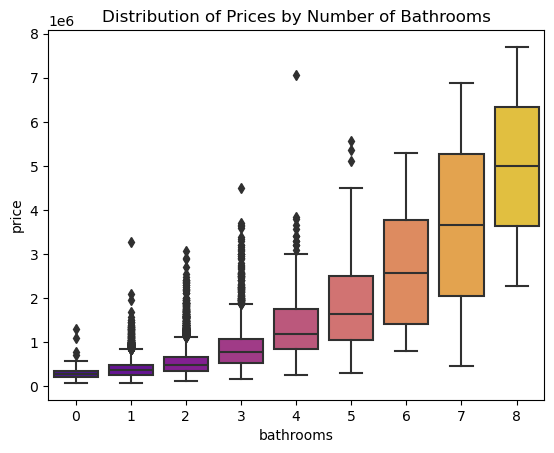

In [65]:
#Create a box plot
sns.boxplot(x="bathrooms", y="price", data=df, palette='plasma')
plt.title('Distribution of Prices by Number of Bathrooms')
df[["bathrooms", "price"]].corr() #correlation between 'bathrooms' and 'price'

,floors,price
floors,1.000000,0.237211
price,0.237211,1.000000


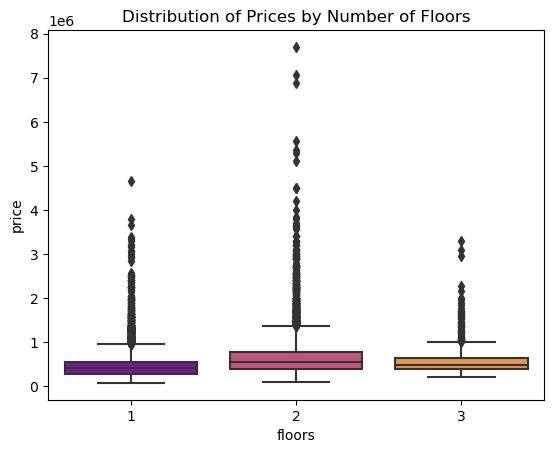

In [66]:
#Create a box plot
sns.boxplot(x="floors", y="price", data=df, palette='plasma')
plt.title('Distribution of Prices by Number of Floors')
df[["floors", "price"]].corr() #correlation between 'floors' and 'price'

,view,price
view,1.000000,0.397293
price,0.397293,1.000000


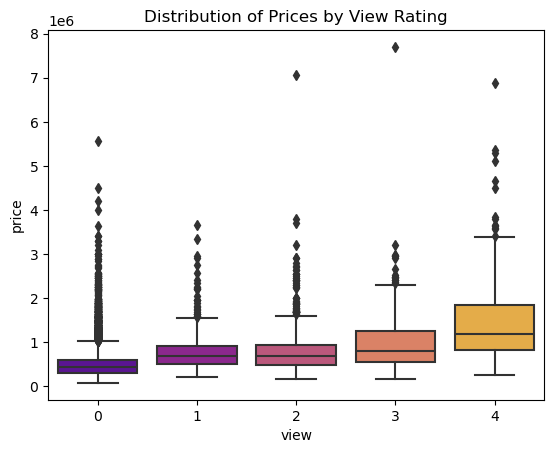

In [67]:
#Create a box plot
sns.boxplot(x="view", y="price", data=df, palette='plasma')
plt.title('Distribution of Prices by View Rating')
df[["view", "price"]].corr() #correlation between 'view' and 'price'

,waterfront,price
waterfront,1.000000,0.266369
price,0.266369,1.000000


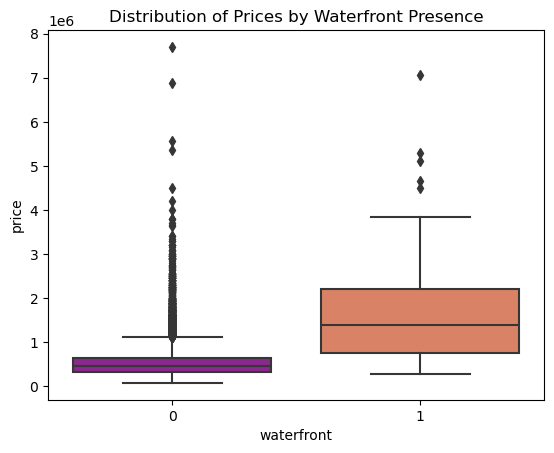

In [68]:
#Create a box plot
sns.boxplot(x="waterfront", y="price", data=df, palette='plasma')
plt.title('Distribution of Prices by Waterfront Presence')
df[["waterfront", "price"]].corr() #correlation between 'waterfront' and 'price'

,condition,price
condition,1.000000,0.036362
price,0.036362,1.000000


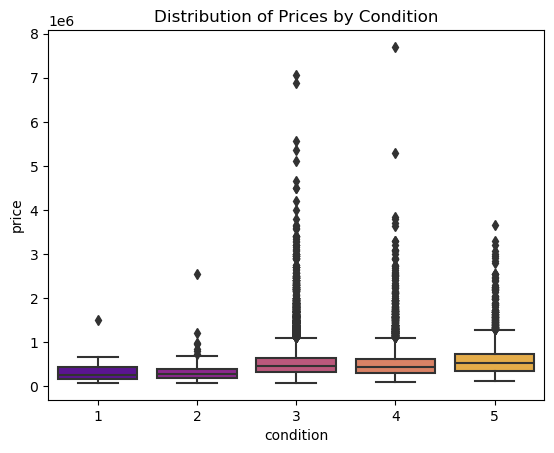

In [69]:
#Create a box plot
sns.boxplot(x="condition", y="price", data=df, palette='plasma')
plt.title('Distribution of Prices by Condition')
df[["condition", "price"]].corr() #correlation between 'condition' and 'price'

,grade,price
grade,1.000000,0.667434
price,0.667434,1.000000


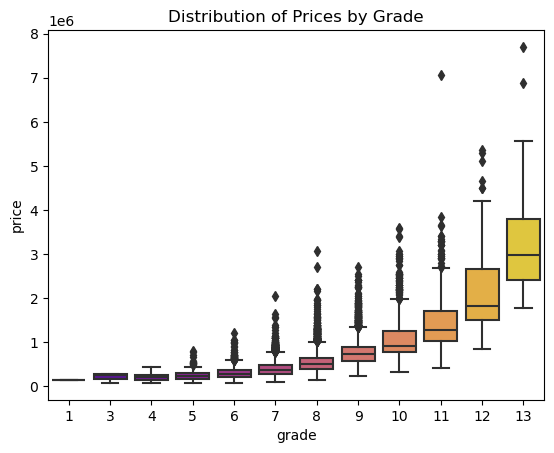

In [70]:
#Create a box plot
sns.boxplot(x="grade", y="price", data=df, palette='plasma')
plt.title('Distribution of Prices by Grade')
df[["grade", "price"]].corr() #correlation between 'grade' and 'price'

,renovated,price
renovated,1.000000,0.126092
price,0.126092,1.000000


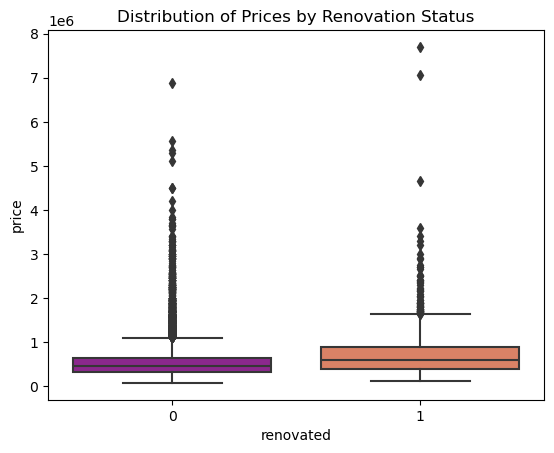

In [71]:
#Create a box plot
sns.boxplot(x="renovated", y="price", data=df, palette='plasma')
plt.title('Distribution of Prices by Renovation Status')
df[["renovated", "price"]].corr() #correlation between 'renovated' and 'price'

In [72]:
#Calculate the correlation of all features with price
df.corr()['price'].sort_values()

house_age       -0.053951
zipcode         -0.053203
year             0.003576
long             0.021626
condition        0.036362
sqft_lot15       0.082447
sqft_lot         0.089661
renovated        0.126092
floors           0.237211
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.510072
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

#### Analysis Conclusion

- sqft_living (0.702) and grade (0.667) have the highest positive correlation with house price 
- sqft_above (0.606), sqft_living15 (0.585), and bathrooms (0.510) also show strong positive correlations with house price
- factors like house age (-0.053951) and zipcode (-0.053203) have minimal impact on the house price.

## Model Development

### Simple Linear Regression Model

* The predictor/independent variable (x)
* The response/dependent variable that we want to predict (y)

In [128]:
# Initialize a Linear Regression model
lm = LinearRegression()

In [130]:
#linear model using "sqft_living "
x = df[['sqft_living']]
y = df['price']

In [132]:
# Fit the Linear Regression model to the training data
lm.fit(x,y)

LinearRegression()

In [134]:
# Predict the target values using the trained Linear Regression model
Yhat = lm.predict(x)
Yhat[0:5]

array([287555.06702451, 677621.82640197, 172499.40418656, 506441.44998452,
       427866.85097324])

In [136]:
lm.intercept_   #intercept value

-43580.74309447396

In [138]:
lm.coef_  #slope value

array([280.6235679])

In [140]:
#calculate R^2 value (coefficient of determination) of the trained Linear Regression model
print("The R^2 value is:", lm.score(x,y))

The R^2 value is: 0.4928532179037931


We can say that ~49.285% of the variation of the price is explained by this simple linear model "sqft_living".

In [143]:
# Calculate the Mean Squared Error (MSE) between the actual and predicted values
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of the price and predicted value is:',mse)

The mean square error of the price and predicted value is: 68351286833.039825


##### Model Equation
**Yhat = a+bx**                   
_price = -43580.74309447396 + 280.6235679*(sqft_living)_

#### Model Evaluation Using Visualization

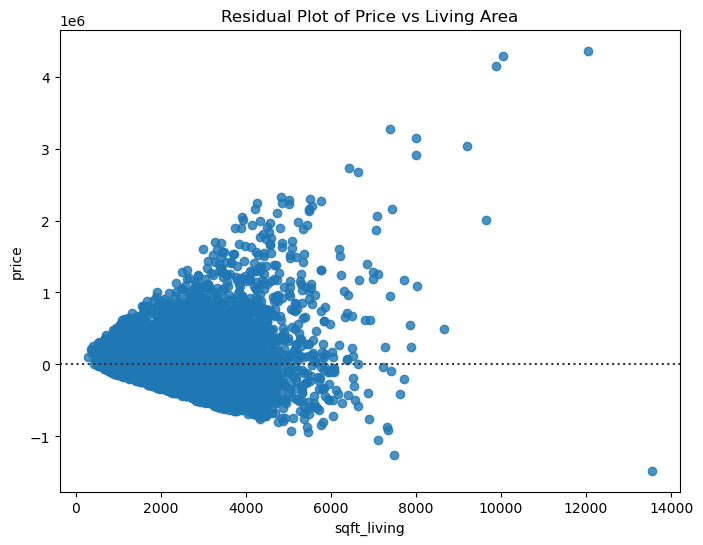

In [157]:
width = 8
height =6
plt.figure(figsize=(width,height))
sns.residplot(x=df['sqft_living'], y= df['price'])
plt.title('Residual Plot of Price vs Living Area')
plt.show()

### Multiple Linear Regression Model

A multiple linear regression model extends the concept of simple linear regression to include multiple independent variables. Instead of modeling the relationship between two variables, it models the relationship between one dependent variable and two or more independent variables.

### 1. Using all predictor variables

In [162]:
lm2 = LinearRegression()

In [164]:
z =df[["sqft_living", "sqft_above","sqft_basement", "sqft_living15", "bathrooms","grade",
       "bedrooms","renovated","view", "sqft_lot", "floors", "condition", "house_age", "lat","long",
       "sqft_lot15","waterfront","zipcode"]]

In [166]:
lm2.fit(z, df['price'])

LinearRegression()

In [168]:
Yhat2 = lm2.predict(z)
Yhat2[0:5]

array([218214.3352104 , 733538.70828942, 395167.06102503, 483687.66866409,
       464295.33560112])

In [412]:
lm2.intercept_

445725.9980704967

In [180]:
lm2.coef_

array([ 1.08392331e+02,  6.95257029e+01,  3.88666281e+01,  2.30563965e+01,
        5.09294118e+04,  9.63752196e+04, -3.55692776e+04,  3.82326522e+04,
        5.26329069e+04,  1.21082303e-01,  2.53881677e+03,  2.72434668e+04,
        2.59218474e+03,  6.03157555e+05, -2.10923742e+05, -3.81308080e-01,
        5.85230457e+05, -5.86575632e+02])

In [414]:
print('The R^2 value is:', lm2.score(z,df['price']))

The R^2 value is: 0.701940804718477


We can say that ~70.194 % of the variation of price is explained by this multiple linear regression "multi_fit"

In [174]:
mse = mean_squared_error(df['price'], Yhat2)
print('The mean square error of the price and predicted value using multifit is:',mse)

The mean square error of the price and predicted value using multifit is: 40171418548.00354


#### Model Evaluation Using Visualization

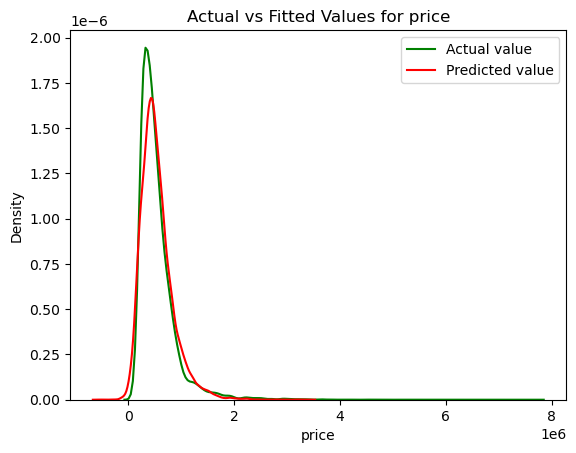

In [416]:
ax1 = sns.distplot(df['price'], hist=False, color="g", label="Actual Value")
sns.distplot(Yhat2, hist=False, color="r", label="Predicted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for price')
plt.xlabel('price')
plt.ylabel('Density')
plt.legend(['Actual value', 'Predicted value'])
plt.show()

### 2. Using good predictor variables selected by analysing data

good predictor variables- sqft_living, sqft_above, sqft_living15, bathrooms, view, grade

In [188]:
lm3 = LinearRegression()

In [190]:
z2 = df[['sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms', 'grade','view']]

In [192]:
lm3.fit(z2, df['price'])

LinearRegression()

In [194]:
Yhat3 = lm3.predict(z2)
Yhat3[0:5]

array([301019.53660593, 529669.92559801, 152252.93899169, 463130.61671599,
       480045.71887291])

In [196]:
lm3.intercept_

-573675.7964790784

In [198]:
lm3.coef_

array([ 1.90736209e+02, -4.32030447e+01,  7.17015262e+00,  3.78851904e+03,
        9.81728108e+04,  9.28118019e+04])

In [200]:
print('The R^2 value is:', lm3.score(z2,df['price']))

The R^2 value is: 0.574438400986532


We can say that ~57.443 % of the variation of price is explained by this multiple linear regression "multi_fit"


In [202]:
mse = mean_squared_error(df['price'], Yhat3)
print('The mean square error of the price and predicted value using multifit is:',mse)

The mean square error of the price and predicted value using multifit is: 57355550594.38124


##### Model Equation

price= -573675.7964790784 + 1.90736209e+02*(sqft_living) -4.32030447e+01*(sqft_above) + 7.17015262e+00*(sqft_living15) + 3.78851904e+03*(bathrooms) + 9.81728108e+04*(grade) + 9.28118019e+04*(view) 

#### Model Evaluation Using Visualization

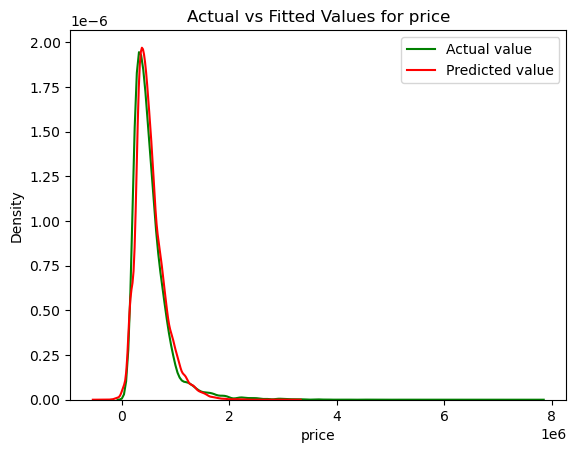

In [425]:
ax1 = sns.distplot(df['price'], hist=False, color="g", label="Actual Value")
sns.distplot(Yhat3, hist=False, color="r", label="Predicted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for price')
plt.xlabel('price')
plt.ylabel('Density')
plt.legend(['Actual value', 'Predicted value'])

plt.show()

### Polynomial Linear Regression Model

Polynomial linear regression is a technique used to model the relationship between the dependent variable 
y and the independent variable 
z by fitting a polynomial equation.

In [216]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [218]:
Pipe = Pipeline(Input)
Pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [220]:
z = z.astype(float)
Pipe.fit(z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [222]:
yPipe = Pipe.predict(z)
yPipe[0:5]

array([285252.25, 598219.25, 470088.25, 397200.25, 438391.25])

In [224]:
print('The R^2 value is:', r2_score(y, yPipe))

The R^2 value is: 0.8297627346850871


We can say that ~82.976% of the variation of price is explained by this polynomial fit.

In [226]:
mse = mean_squared_error(df['price'], yPipe)
print('The mean square error of the price and predicted value using polynomial fit is:',mse)

The mean square error of the price and predicted value using polynomial fit is: 22943921882.17522


#### Model Evaluation Using Visualization

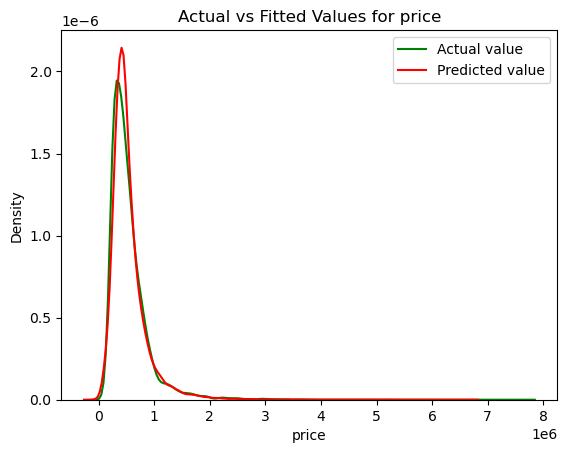

In [228]:
ax1 = sns.distplot(df['price'], hist=False, color="g", label="Actual Value")
sns.distplot(yPipe, hist=False, color="r", label="Predicted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for price')
plt.xlabel('price')
plt.ylabel('Density')
plt.legend(['Actual value', 'Predicted value'])

plt.show()

#### Final Model Performance Evaluation

- R-squared value of Polynomial Linear Regression Model is higher than the Simple and Multiple Linear Regression Model.     
- Mean Squared Error value for Polynomial Linear Regression Model is smaller than the Simple and Multiple Linear Regression Model.    

Therefore, Polynomial Linear Regression Model is the most suitable model for this data.

## Model Training and Evaluation

### Data Splitting for Training and Testing

In [402]:
X = df[["sqft_living", "sqft_above", "sqft_living15", "bathrooms", "grade", "bedrooms", "view", "sqft_lot", "floors", "condition", "house_age", "lat", "sqft_lot15", "renovated"]]
y = df['price']

In [404]:
#splitting the dataset: 20% of the data will be used for testing, and 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# shape of all train and test data varibales
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17290, 14)
(4323, 14)
(17290,)
(4323,)


In [406]:
lr = LinearRegression()

In [408]:
lr.fit(X_train[['sqft_living']],y_train)

LinearRegression()

In [410]:
print('The R^2 value is:',lr.score(X_test[['sqft_living']], y_test)) #calculating the R^2 on the test data

The R^2 value is: 0.49406905389089006


In [412]:
print('The R^2 value is:',lr.score(X_train[['sqft_living']], y_train)) #calculating the R^2 of the training data

The R^2 value is: 0.49238383875829517


### Cross-validation score

In [415]:
Rcross  = cross_val_score(lr, X[['sqft_living']],y, cv = 4)

In [417]:
Rcross

array([0.48405393, 0.49342812, 0.4945384 , 0.49661067])

In [419]:
print("The mean of the folds are", Rcross.mean())

The mean of the folds are 0.49215778141759514


In [421]:
print("The standard deviation is ", Rcross.std())

The standard deviation is  0.004816164814374254


##### Creating function for distribution plot

In [271]:
def DistributionPlot(actualFunction, predictFunction, actualName, predictName, Title):
    width = 8
    height = 6
    plt.figure(figsize = (width, height))
    axl = sns.kdeplot(actualFunction, color = "r", label = actualName)
    ax2 = sns.kdeplot(predictFunction, color = "g", label = predictName, ax = axl)
    plt.title(Title)
    plt.xlabel('price')
    plt.ylabel('proportions of houses')
    plt.show()
    plt.close()

In [273]:
def PollyPlot(x_train, x_test, y_train, y_test, lr, poly_transform):
    width = 8
    height = 6
    plt.figure(figsize=(width, height))
    
    # Define the range for the plot
    xmax = max([x_train.max(), x_test.max()])
    xmin = min([x_train.min(), x_test.min()])
    x = np.arange(xmin, xmax, 0.1).reshape(-1, 1)
    
    # Plot training and test data
    plt.plot(x_train, y_train, 'ro', label='Training Data')
    plt.plot(x_test, y_test, 'go', label='Test Data')
    # Plot the predicted function
    plt.plot(x, lr.predict(poly_transform.transform(x)), label='Predicted Function')
    
    plt.ylim([y_train.min() - 10000, y_train.max() + 10000])
    plt.ylabel('Price')
    plt.legend()
    plt.show()

In [275]:
lr1 = LinearRegression()

In [423]:
lr1.fit(X_train[["sqft_living", "sqft_above", "sqft_living15", "bathrooms", "grade", "bedrooms", "view", "sqft_lot", "floors", "condition", "house_age", "lat", "sqft_lot15", "renovated"]],y_train)

LinearRegression()

In [425]:
yhat_train = lr1.predict(X_train[["sqft_living", "sqft_above", "sqft_living15", "bathrooms", "grade", "bedrooms", "view", "sqft_lot", "floors", "condition", "house_age", "lat", "sqft_lot15", "renovated"]])
yhat_train[0:5]

array([466817.79486561, 262734.02811529, 169526.40343334, 378075.1810009 ,
       532136.68969351])

In [427]:
yhat_test = lr1.predict(X_test[["sqft_living", "sqft_above", "sqft_living15", "bathrooms", "grade", "bedrooms", "view", "sqft_lot", "floors", "condition", "house_age", "lat", "sqft_lot15", "renovated"]])
yhat_test

array([ 470467.68784199,  790132.45875568, 1250259.99348028, ...,
        366925.25227156,  573073.42732165,  384188.05378043])

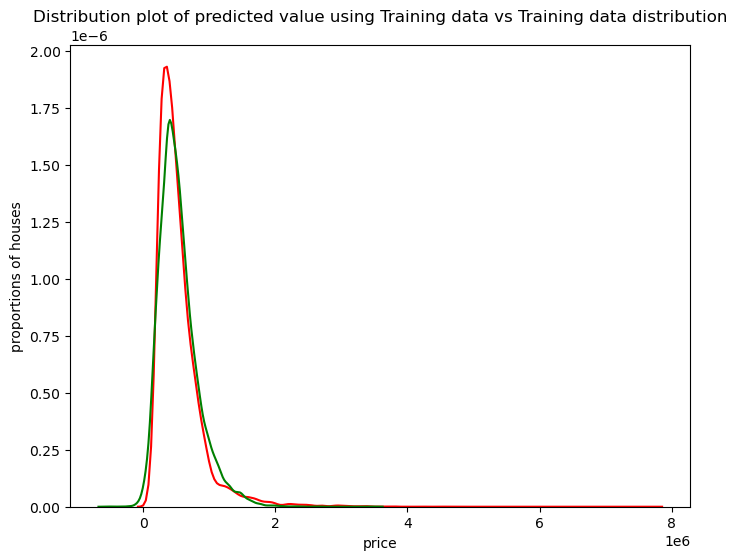

In [429]:
Title  = 'Distribution plot of predicted value using Training data vs Training data distribution'
DistributionPlot(y_train, yhat_train, "Actual values(Train)", "Predicted values(Train)", Title)

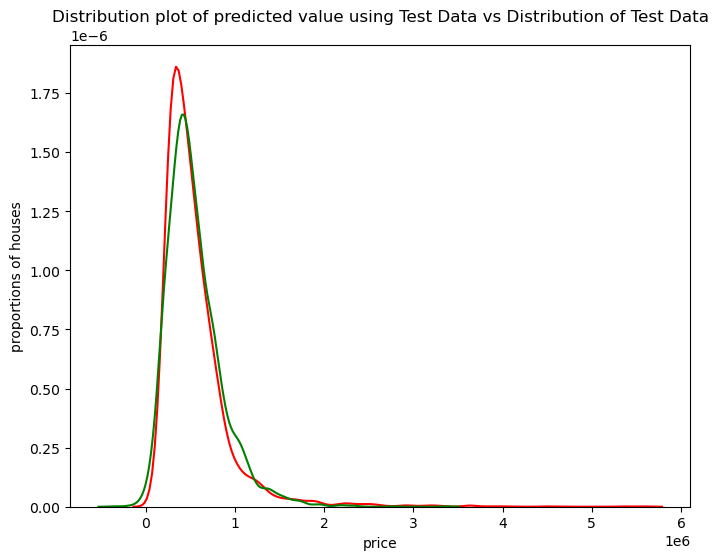

In [431]:
Title = 'Distribution plot of predicted value using Test Data vs Distribution of Test Data'
DistributionPlot(y_test, yhat_test, "Actual values(Test)", "predicted values(Test)", Title)

## Model Selection

In [434]:
X = df[["year", "sqft_living", "sqft_above", "sqft_basement", "sqft_living15", "bathrooms", "grade", "bedrooms", "view", "sqft_lot", "floors", "waterfront", "condition", "house_age", "renovated", "lat", "long", "sqft_lot15", "zipcode"]]
y = df['price']

#### Separate Train and Test Data

In [437]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17290, 19)
(4323, 19)
(17290,)
(4323,)


#### Feature Engineering

In [440]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [442]:
X_train

array([[-0.68884041, -0.32393262, -0.00725676, ...,  0.44228847,
         0.01344043, -0.6746308 ],
       [ 1.45171507, -1.18365301, -1.20004764, ..., -0.53995821,
        -0.28066159,  0.75060414],
       [ 1.45171507, -1.09547656, -0.96879226, ..., -0.86025604,
        -0.1789339 ,  1.2756907 ],
       ...,
       [-0.68884041,  0.05081729,  0.40656864, ...,  1.29641601,
        -0.36604019, -0.4683468 ],
       [-0.68884041, -1.8670205 , -1.71124373, ..., -0.77484328,
         0.08265159,  1.68825871],
       [ 1.45171507,  1.16404497,  1.63587352, ...,  0.81952813,
        -0.24443927, -0.6746308 ]])

In [444]:
X_test

array([[-0.68884041, -0.00429299,  0.34571197, ...,  0.37111117,
        -0.18256703, -0.37458134],
       [-0.68884041,  0.91053768,  0.05359991, ..., -0.50436956,
        -0.23404851,  0.69434487],
       [-0.68884041,  1.86945657,  2.41483899, ...,  0.60599625,
        -0.11044936, -1.34974209],
       ...,
       [-0.68884041,  0.39690986,  0.78874858, ..., -0.4901341 ,
        -0.30246038, -1.44350754],
       [-0.68884041,  0.19410402,  0.564796  , ...,  0.68429127,
        -0.10808783, -1.31223591],
       [-0.68884041,  0.54680982,  0.95427874, ..., -0.58266459,
        -0.24443927, -1.40600136]])

##### Creating function for model selection

In [447]:
def evaluate_model(true, predicted):
    mse = mean_squared_error(true, predicted)
    r2_square = r2_score(true, predicted)
    return mse, r2_square

In [449]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "SVR": SVR()
}
model_list = []
r2_list =[]

In [451]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    # Evaluate Train and Test dataset
    model_train_mse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    print('Model performance for Training set')
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('---------------------------------------')

    print('Model performance for Test set')
    print("- Mean Squared Error: {:.4f}".format(model_test_mse))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*40)
    print('\n')

Linear Regression
Model performance for Training set
- Mean Squared Error: 38822330302.7132
- R2 Score: 0.7028
---------------------------------------
Model performance for Test set
- Mean Squared Error: 44815845334.4006
- R2 Score: 0.7036


Lasso
Model performance for Training set
- Mean Squared Error: 38824763476.0540
- R2 Score: 0.7028
---------------------------------------
Model performance for Test set
- Mean Squared Error: 44819029980.0178
- R2 Score: 0.7035


Ridge
Model performance for Training set
- Mean Squared Error: 38824763659.2976
- R2 Score: 0.7028
---------------------------------------
Model performance for Test set
- Mean Squared Error: 44819178590.3999
- R2 Score: 0.7035


K-Neighbors Regressor
Model performance for Training set
- Mean Squared Error: 18065402961.6238
- R2 Score: 0.8617
---------------------------------------
Model performance for Test set
- Mean Squared Error: 32677990718.5310
- R2 Score: 0.7838


Decision Tree
Model performance for Training set
- M

In [452]:
#Create a DataFrame to compare the R^2 scores of different models
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
6,XGBRegressor,0.860467
5,Random Forest Regressor,0.859421
3,K-Neighbors Regressor,0.783842
4,Decision Tree,0.722223
0,Linear Regression,0.703553
1,Lasso,0.703532
2,Ridge,0.703531
7,AdaBoost Regressor,0.259018
8,SVR,-0.063239


XGBoost Regression achieved the highest R-squared score of 0.8605, indicating the best performance among the evaluated models.   
This suggests that XGBoost Regression is the most effective model for capturing the underlying patterns in the data and making accurate predictions.

### XGBoost Regression

In [466]:
xgb_regressor = XGBRegressor()
xgb_regressor.fit(X_train, y_train)
y_pred = xgb_regressor.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(f"Accuracy of the model is {score:.2f}%")

Accuracy of the model is 86.05%


Text(0.5, 1.0, 'XGBoost Regression Plot')

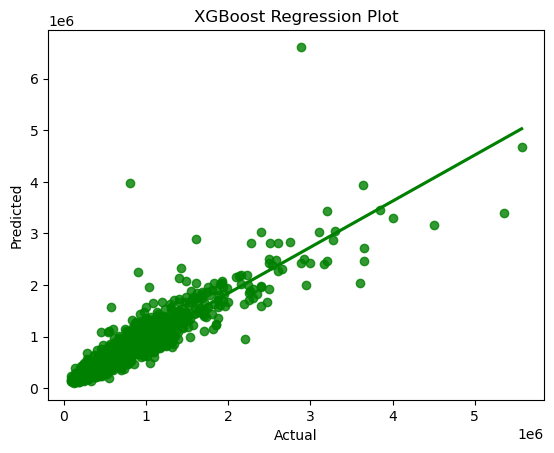

In [468]:
#regression plot to visualize the relationship between the actual and predicted values
sns.regplot(x=y_test,y=y_pred,ci=None,color ='green')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("XGBoost Regression Plot")

### Difference between Actual and Predicted Values

In [471]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
735,365000,4.076466e+05,-42646.56250
2830,865000,9.802069e+05,-115206.93750
4106,1038000,1.141875e+06,-103874.62500
16218,1490000,1.764366e+06,-274366.25000
19964,711000,8.196749e+05,-108674.93750
...,...,...,...
13674,338000,3.429578e+05,-4957.84375
20377,673000,8.648104e+05,-191810.43750
8805,285000,3.145830e+05,-29582.96875
10168,605000,5.845551e+05,20444.87500


## Testing Model

In [474]:
# testing the model on new data
new_data = df.drop('price', axis=1).iloc[0].values.reshape(1, -1)
new_data

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  9.81780e+04,
         4.75112e+01, -1.22257e+02,  1.34000e+03,  5.65000e+03,
         0.00000e+00,  2.01400e+03,  5.90000e+01]])

In [476]:
# scaling the new data
new_data = scaler.transform(new_data)
new_data

array([[-4.30534590e+03, -2.28475643e+00, -7.37536891e-01,
         1.22222270e+01, -2.90937691e+00, -2.39232078e+00,
        -6.53995466e+00, -3.95263347e-01,  8.88372741e+00,
        -3.50659236e-01, -2.61444915e+00,  1.16349292e+06,
         6.76769374e+01, -5.62127323e+00,  6.71193141e+03,
         4.04718747e+04,  8.69887187e+02, -3.89146906e-01,
        -1.83815878e+03]])

In [478]:
# Predicting the price of the house
price = xgb_regressor.predict(new_data)
print(f"The price of the house is: {price[0]:.2f}")

The price of the house is: 150877.38


In [480]:
# Actual price of the house
actual_price = df['price'].iloc[0]
print(f"The actual price of the house is: {actual_price:.2f}")

The actual price of the house is: 221900.00


In [482]:
# Difference between actual and predicted price
difference = actual_price - price[0]
print(f"The difference between actual and predicted price is: {difference:.2f}")

The difference between actual and predicted price is: 71022.62
